In [33]:
from jupyterlab.extensions.pypi import xmlrpc_transport_override
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from eeg_lib.commons.constant import DATASETS_FOLDER
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.commons.constant import NUM_OF_ELECTRODES
from eeg_lib.models.similarity.eegnet import EEGNetEmbeddingModel
from eeg_lib.utils.engine import train_eegnet, generate_embeddings_2d
from eeg_lib.utils.helpers import train_test_split_eeg, EEGTripletDataset, set_seeds, create_user_profiles, predict_ids
from eeg_lib.utils.visualisations import plot_loss, plot_embeddings_2d, plot_embeddings_by_participant, plot_UMAP, plot_PCA, plot_tSNE, plot_LDA, plot_confusion_matrix
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Loading data


In [35]:
# Load data
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants_info = extractor.extract_dataframe()

Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/011595b1@1651.fif...


C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 207624 =      0.000 ...   830.496 secs
Ready.
Reading 0 ... 207624  =      0.000 ...   830.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 212349 =      0.000 ...   849.396 secs
Ready.
Reading 0 ... 212349  =      0.000 ...   849.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 184624 =      0.000 ...   738.496 secs
Ready.
Reading 0 ... 184624  =      0.000 ...   738.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/25d0bdb3@1318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 216624 =      0.000 ...   866.496 secs
Ready.
Reading 0 ... 216624  =      0.000 ...   866.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2718372d@1400.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 206649 =      0.000 ...   826.596 secs
Ready.
Reading 0 ... 206649  =      0.000 ...   826.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2882ae26@1441.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 198649 =      0.000 ...   794.596 secs
Ready.
Reading 0 ... 198649  =      0.000 ...   794.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 200824 =      0.000 ...   803.296 secs
Ready.
Reading 0 ... 200824  =      0.000 ...   803.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 244074 =      0.000 ...   976.296 secs
Ready.
Reading 0 ... 244074  =      0.000 ...   976.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 193174 =      0.000 ...   772.696 secs
Ready.
Reading 0 ... 193174  =      0.000 ...   772.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/446b3735@1618.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 196549 =      0.000 ...   786.196 secs
Ready.
Reading 0 ... 196549  =      0.000 ...   786.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 194099 =      0.000 ...   776.396 secs
Ready.
Reading 0 ... 194099  =      0.000 ...   776.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 225674 =      0.000 ...   902.696 secs
Ready.
Reading 0 ... 225674  =      0.000 ...   902.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/541c91f2@1456.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 189324 =      0.000 ...   757.296 secs
Ready.
Reading 0 ... 189324  =      0.000 ...   757.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 212374 =      0.000 ...   849.496 secs
Ready.
Reading 0 ... 212374  =      0.000 ...   849.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 198274 =      0.000 ...   793.096 secs
Ready.
Reading 0 ... 198274  =      0.000 ...   793.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 202024 =      0.000 ...   808.096 secs
Ready.
Reading 0 ... 202024  =      0.000 ...   808.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 245649 =      0.000 ...   982.596 secs
Ready.
Reading 0 ... 245649  =      0.000 ...   982.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 200974 =      0.000 ...   803.896 secs
Ready.
Reading 0 ... 200974  =      0.000 ...   803.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8dca0725@1418.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 184299 =      0.000 ...   737.196 secs
Ready.
Reading 0 ... 184299  =      0.000 ...   737.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 204724 =      0.000 ...   818.896 secs
Ready.
Reading 0 ... 204724  =      0.000 ...   818.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 215024 =      0.000 ...   860.096 secs
Ready.
Reading 0 ... 215024  =      0.000 ...   860.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/b34b1427@0906.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 201674 =      0.000 ...   806.696 secs
Ready.
Reading 0 ... 201674  =      0.000 ...   806.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 199049 =      0.000 ...   796.196 secs
Ready.
Reading 0 ... 199049  =      0.000 ...   796.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 201699 =      0.000 ...   806.796 secs
Ready.
Reading 0 ... 201699  =      0.000 ...   806.796 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 207449 =      0.000 ...   829.796 secs
Ready.
Reading 0 ... 207449  =      0.000 ...   829.796 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 219424 =      0.000 ...   877.696 secs
Ready.
Reading 0 ... 219424  =      0.000 ...   877.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 253624 =      0.000 ...  1014.496 secs
Ready.
Reading 0 ... 253624  =      0.000 ...  1014.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 205174 =      0.000 ...   820.696 secs
Ready.
Reading 0 ... 205174  =      0.000 ...   820.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 228724 =      0.000 ...   914.896 secs
Ready.
Reading 0 ... 228724  =      0.000 ...   914.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


    Range : 0 ... 197099 =      0.000 ...   788.396 secs
Ready.
Reading 0 ... 197099  =      0.000 ...   788.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

# Exploratory data analysis


In [36]:
eeg_df.head()

,participant_id,epoch,label
0,011595b1@1651,"[[1.5994905899983496e-06, 4.660259780289654e-0...",gray
1,011595b1@1651,"[[3.2936710911247503e-06, 3.745427511069207e-0...",green
2,011595b1@1651,"[[4.327731927482567e-06, 2.515285592381088e-06...",gray
3,011595b1@1651,"[[1.7759480686267016e-06, -3.0099938072414544e...",red
4,011595b1@1651,"[[4.0924612078715145e-06, 4.532130983695527e-0...",gray


In [37]:
eeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  6960 non-null   object
 1   epoch           6960 non-null   object
 2   label           6960 non-null   object
dtypes: object(3)
memory usage: 163.3+ KB


In [38]:
eeg_df.describe()

,participant_id,epoch,label
count,6960,6960,6960
unique,30,6960,6
top,011595b1@1651,"[[7.765466320882314e-06, 7.001198703267933e-06...",gray
freq,232,1,3480


In [39]:
eeg_df['label'].value_counts()

label
gray      3480
green      840
red        840
yellow     840
blue       840
break      120
Name: count, dtype: int64

In [40]:
sample = eeg_df['epoch'].iloc[0]
sample.shape

(4, 751)

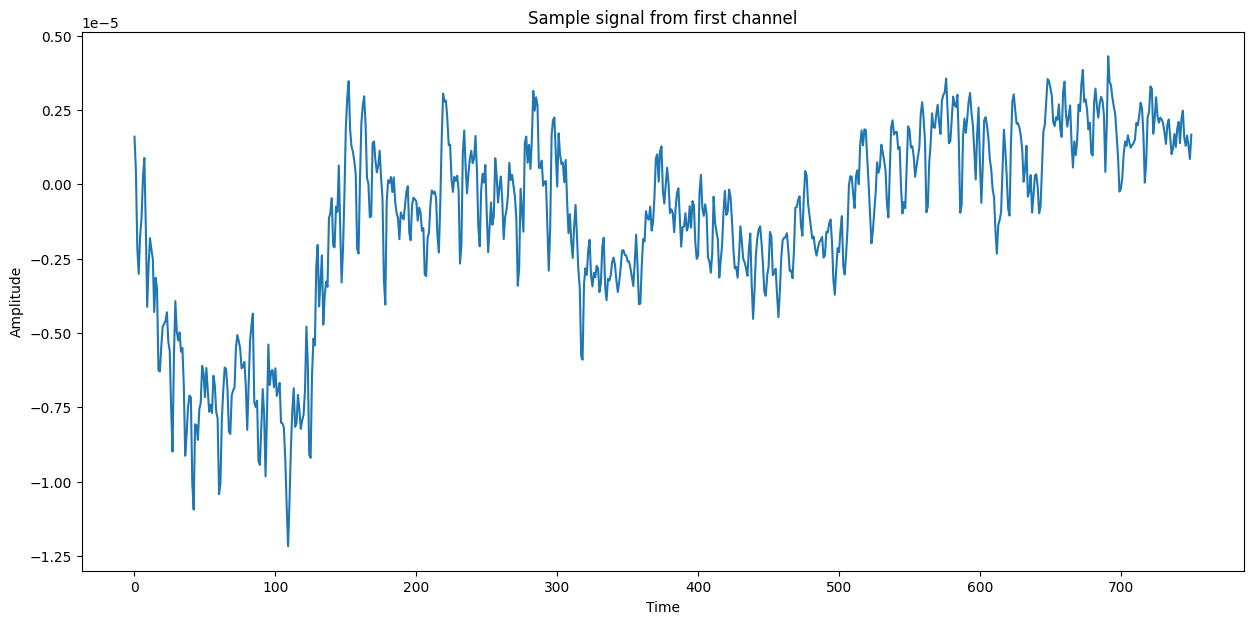

In [41]:
from eeg_lib.utils.visualisations import plot_sample_signal, plot_sample_signals
plot_sample_signal(sample)

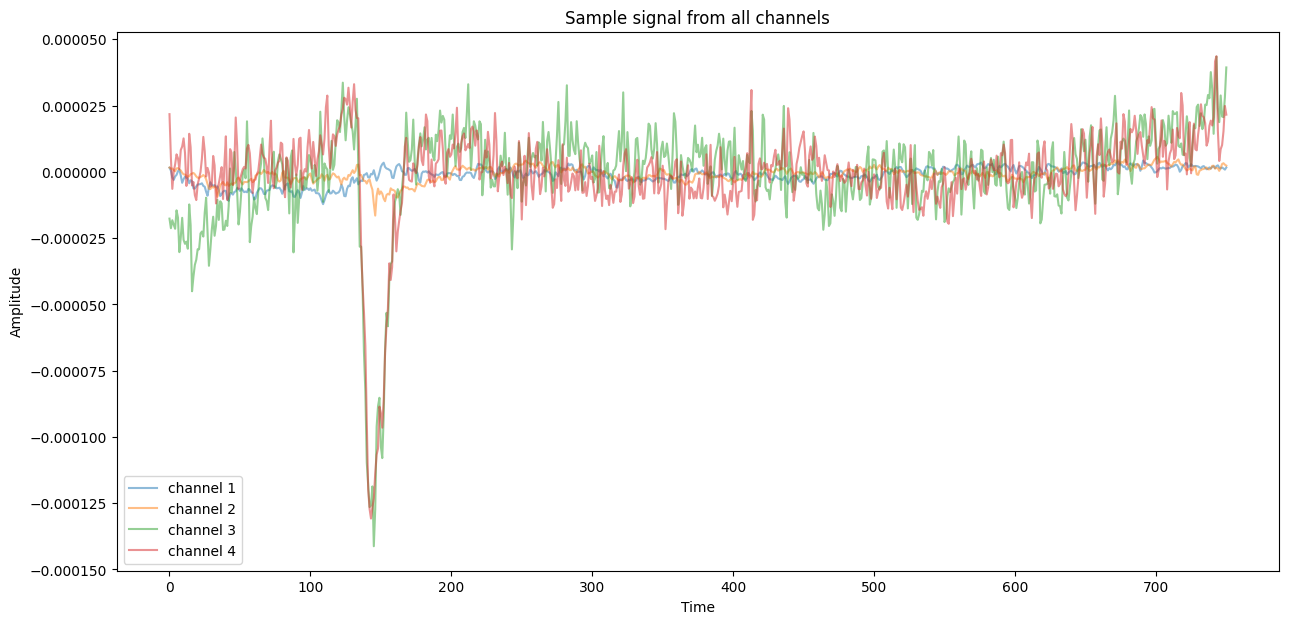

In [42]:
plot_sample_signals(sample)

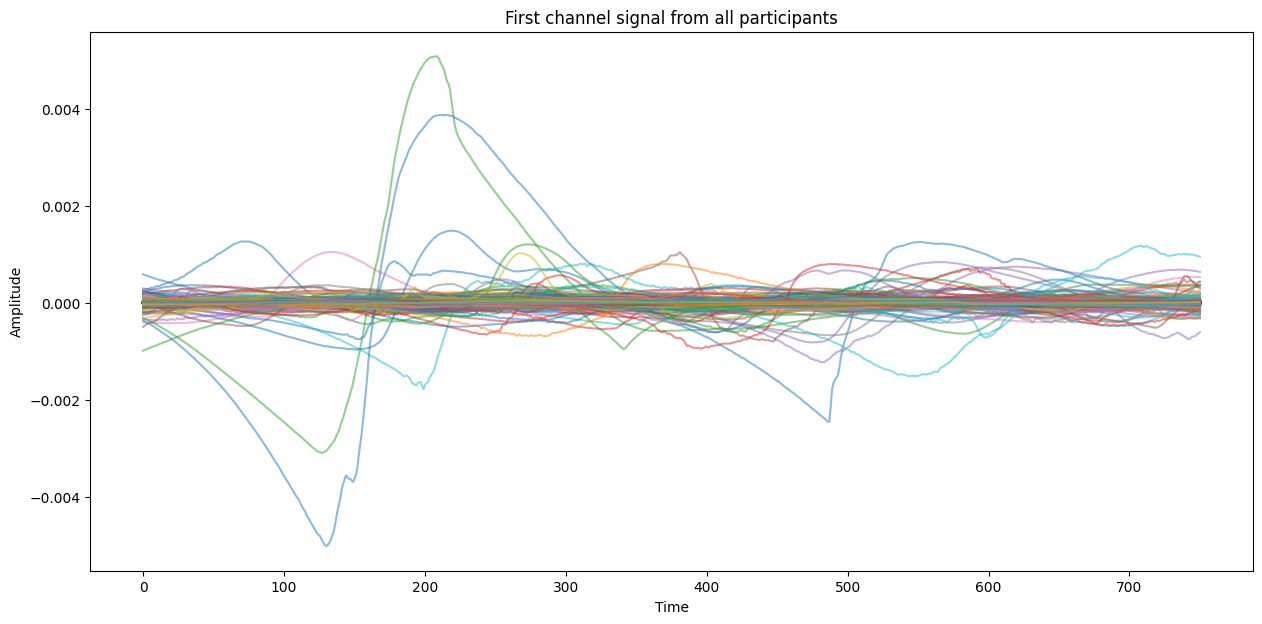

In [43]:
from eeg_lib.utils.visualisations import plot_first_channel
plot_first_channel(eeg_df)

# Preparing data


In [44]:
set_seeds()
train_df, test_df, train_participants, test_participants = train_test_split_eeg(
    eeg_df, test_size=0.2
)

train_dataset = EEGTripletDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [45]:
test_dataset = EEGTripletDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Loading model


In [46]:
print(f"Number of samples in train_dataset: {len(train_dataset)}")

sample_anchor, sample_positive, sample_negative = train_dataset[0]
print(f"Shape of anchor: {sample_anchor.shape}")
print(f"Shape of positive: {sample_positive.shape}")
print(f"Shape of negative: {sample_negative.shape}")

Number of samples in train_dataset: 5568
Shape of anchor: torch.Size([1, 4, 751])
Shape of positive: torch.Size([1, 4, 751])
Shape of negative: torch.Size([1, 4, 751])


In [47]:
eegnet_model = EEGNetEmbeddingModel(
    num_channels=4, num_time_points=751, num_classes=32, embedding_dimension=32
)

triplet_loss = torch.nn.TripletMarginLoss(margin=0.05)
eegnet_optimizer = torch.optim.Adam(eegnet_model.parameters(), lr=1e-3)

num_epochs = 40

In [48]:
for anchor, positive, negative in train_loader:
    print(f"Anchor shape: {anchor.shape}")
    print(f"Positive shape: {positive.shape}")
    print(f"Negative shape: {negative.shape}")
    break  # Print shapes for the first batch only

Anchor shape: torch.Size([8, 1, 4, 751])
Positive shape: torch.Size([8, 1, 4, 751])
Negative shape: torch.Size([8, 1, 4, 751])


In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
eegnet_model = eegnet_model.to(device)

In [50]:
train_history = train_eegnet(
    eegnet_model, train_loader, eegnet_optimizer, device, triplet_loss, num_epochs
)

Epoch 1/40 | Train Loss: 0.1684
Epoch 2/40 | Train Loss: 0.0836
Epoch 3/40 | Train Loss: 0.0666
Epoch 4/40 | Train Loss: 0.0595
Epoch 5/40 | Train Loss: 0.0495
Epoch 6/40 | Train Loss: 0.0414
Epoch 7/40 | Train Loss: 0.0382
Epoch 8/40 | Train Loss: 0.0342
Epoch 9/40 | Train Loss: 0.0335
Epoch 10/40 | Train Loss: 0.0315
Epoch 11/40 | Train Loss: 0.0308
Epoch 12/40 | Train Loss: 0.0300
Epoch 13/40 | Train Loss: 0.0272
Epoch 14/40 | Train Loss: 0.0270
Epoch 15/40 | Train Loss: 0.0252
Epoch 16/40 | Train Loss: 0.0249
Epoch 17/40 | Train Loss: 0.0249
Epoch 18/40 | Train Loss: 0.0247
Epoch 19/40 | Train Loss: 0.0244
Epoch 20/40 | Train Loss: 0.0227
Epoch 21/40 | Train Loss: 0.0218
Epoch 22/40 | Train Loss: 0.0232
Epoch 23/40 | Train Loss: 0.0221
Epoch 24/40 | Train Loss: 0.0218
Epoch 25/40 | Train Loss: 0.0210
Epoch 26/40 | Train Loss: 0.0210
Epoch 27/40 | Train Loss: 0.0211
Epoch 28/40 | Train Loss: 0.0208
Epoch 29/40 | Train Loss: 0.0216
Epoch 30/40 | Train Loss: 0.0198
Epoch 31/40 | Train

In [51]:
model_save_path = f"./eegnet_model.pth"
torch.save(eegnet_model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to ./eegnet_model.pth


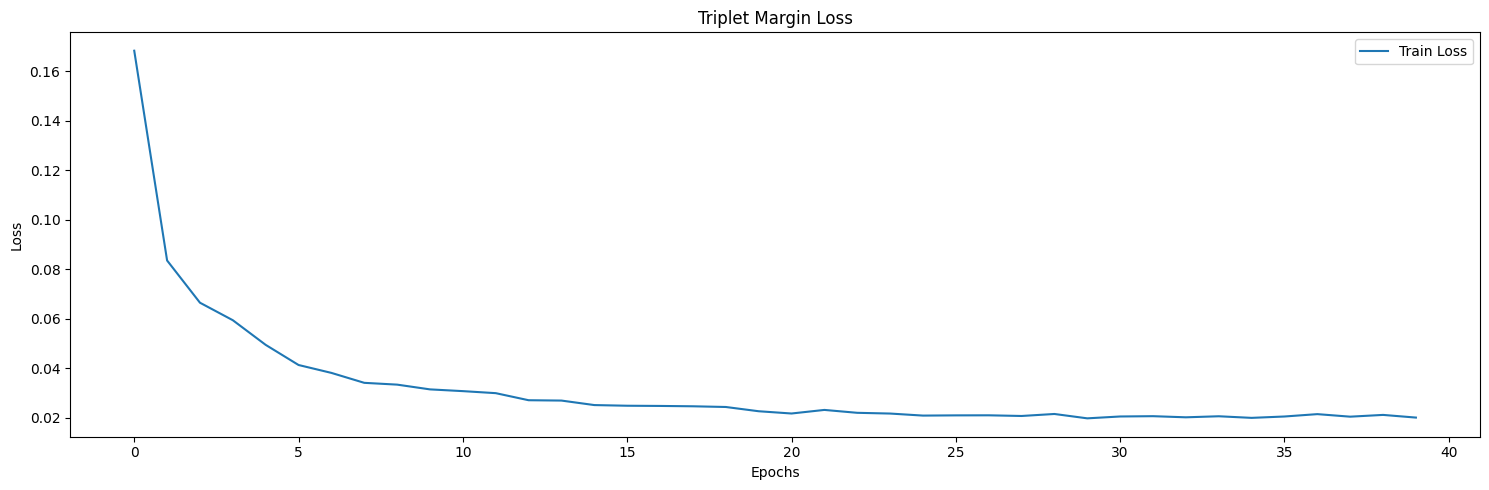

In [52]:
plot_loss(train_history)

## Embeddings visualization

In [53]:
embeddings_2d = generate_embeddings_2d(eegnet_model, test_loader, device)
print(f"Generated test embeddings with shape: {embeddings_2d.shape}")

Generated test embeddings with shape: (1392, 32)


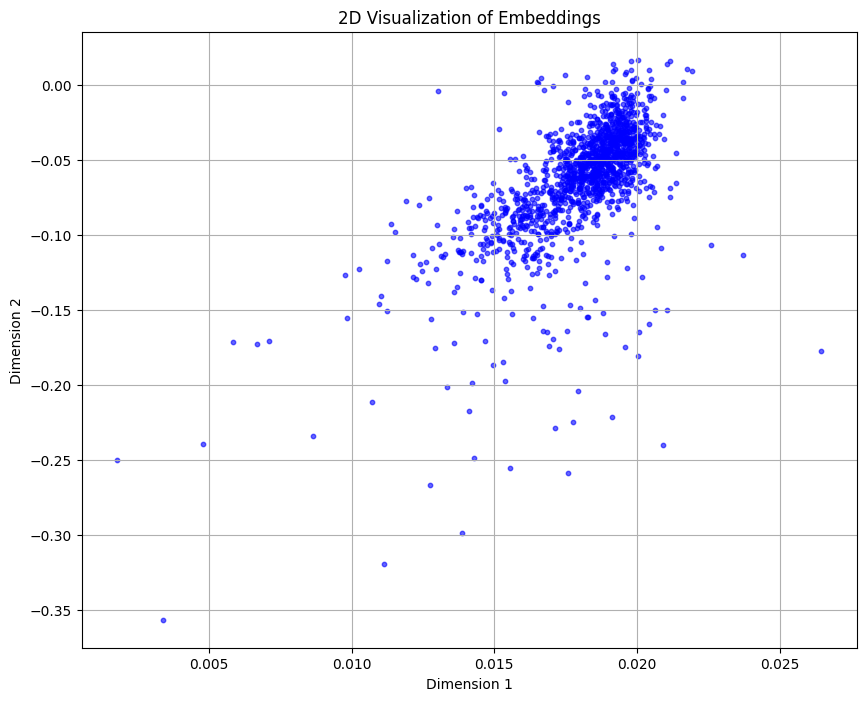

In [54]:
plot_embeddings_2d(embeddings_2d)

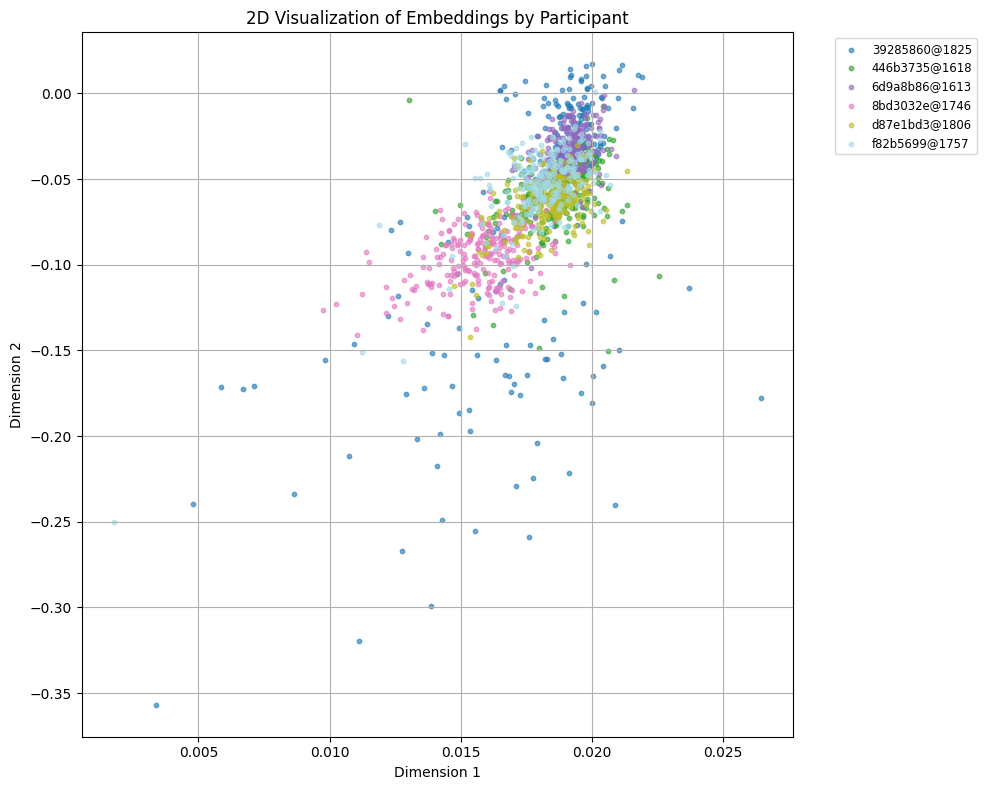

In [55]:
participant_ids = test_participants['participant_id']
plot_embeddings_by_participant(embeddings_2d, participant_ids)

C:\Users\basia\Desktop\Neuroguard\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


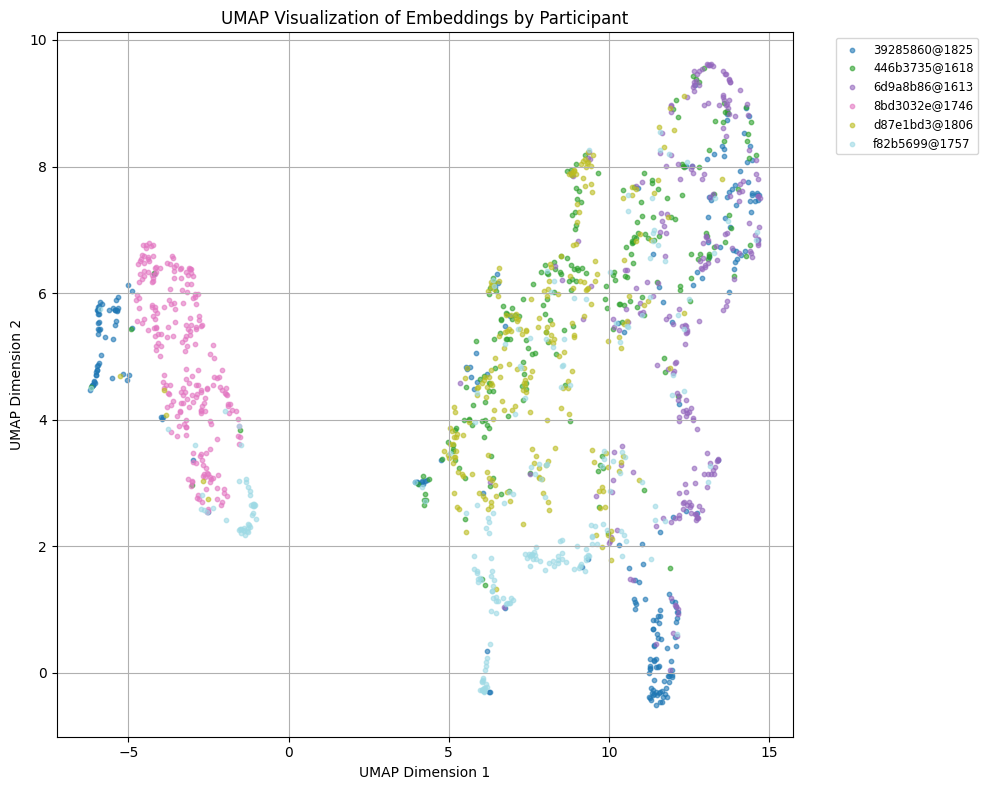

In [56]:
plot_UMAP(embeddings_2d, participant_ids)

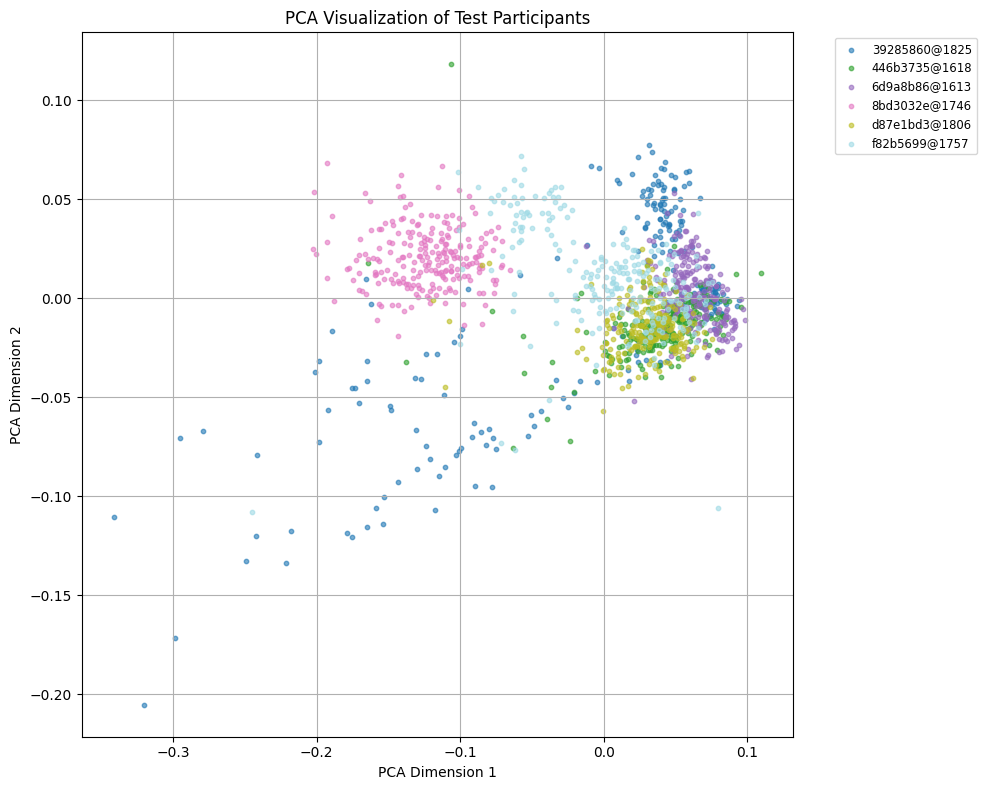

In [57]:
plot_PCA(embeddings_2d, participant_ids)

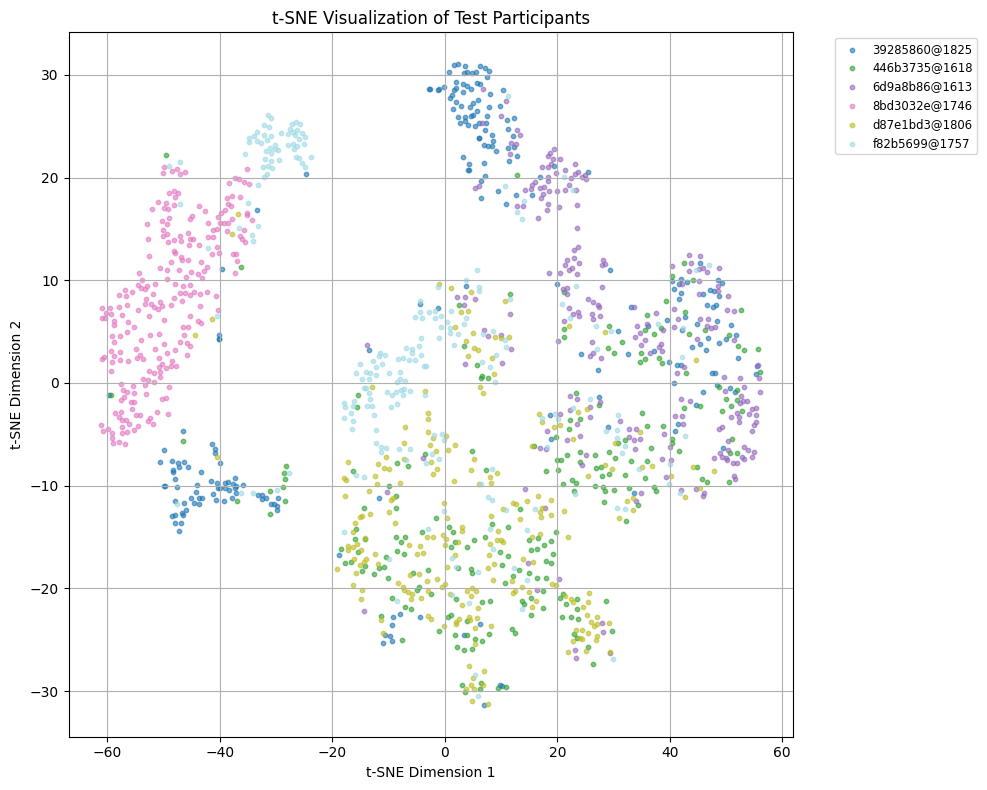

In [58]:
plot_tSNE(embeddings_2d, participant_ids)

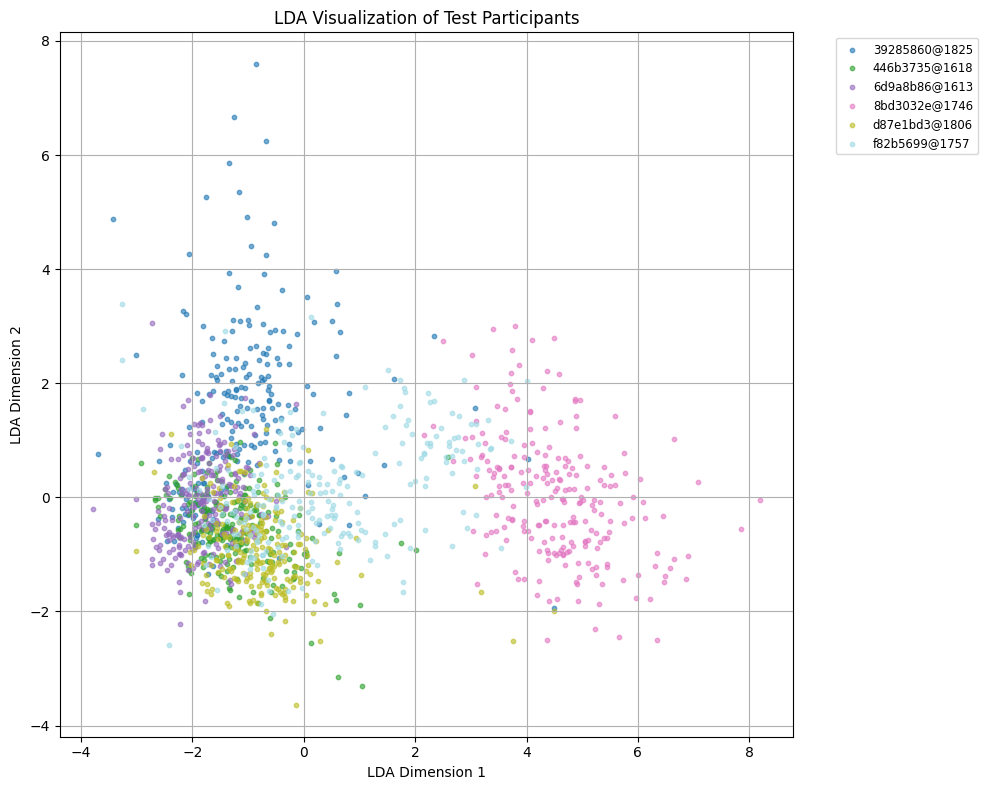

In [59]:
plot_LDA(embeddings_2d, participant_ids)

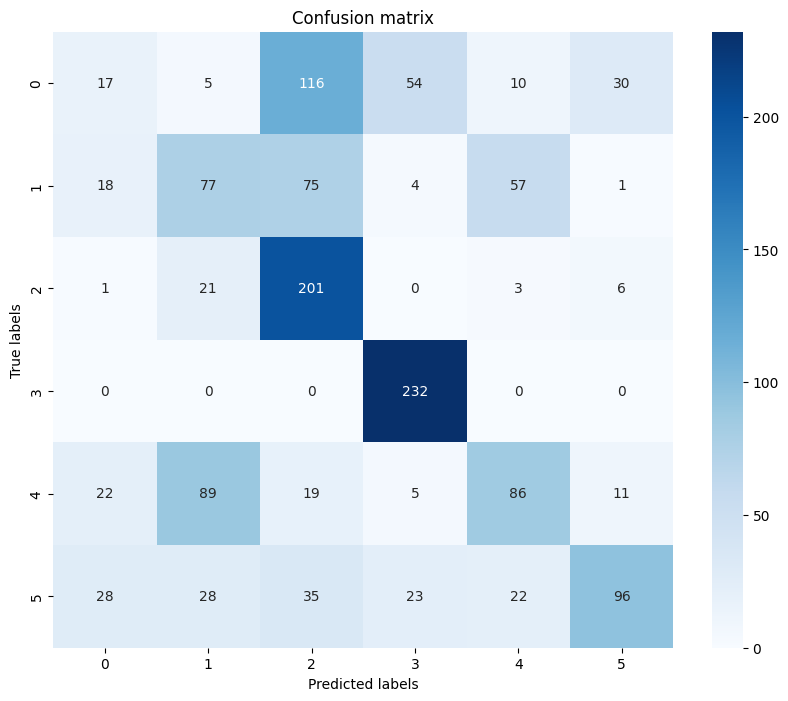

In [60]:
user_profiles = create_user_profiles(embeddings_2d, participant_ids)
predicted_ids = predict_ids(embeddings_2d, user_profiles)
conf_matrix = confusion_matrix(participant_ids, predicted_ids)
plot_confusion_matrix(conf_matrix)

In [61]:
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.509
